In [2]:
import tclab
from tclab import Plotter, clock, Historian

import numpy as np
import tbcontrol
from tbcontrol import blocksim

import matplotlib.pyplot as plt
import pandas as pd

import sympy
s = sympy.Symbol('s')

%matplotlib inline

In [3]:
Kp, τp, θp, To_p = 0.6423177737615754, 150.3121523254063, 17.396993066317368, 57.79957014481422
τc = 0.8*θp
f = 1/(τc*s+1)
G_ = Kp/(τp*s+1)
Gc_star = f*(G_)**-1

Gimc = blocksim.LTI('Gc_imc','E','P',[τp,1],[Kp*τc,Kp]) #HERE I STRUGGLE WITH tau_c
Gm = blocksim.LTI('Gc_m','P','Yt',[Kp],[τp,1])  #model is just the FOPDT fitted to our model

# diagram_imc = blocksim.Diagram([Gimc,Gm],sums={},inputs={'E': blocksim.step()})

# ts = np.linspace(0, 50, 1000)

# simulation_imc = diagram_imc.simulate(ts) #, progress = True)

# plt.plot(list(ts), simulation_imc['Yt'])
# plt.show()

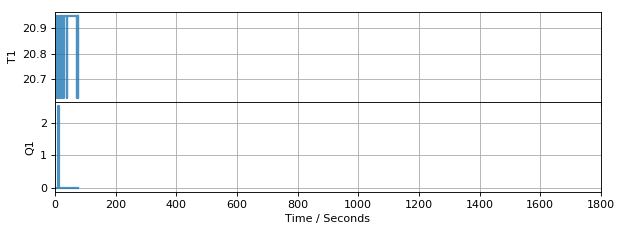

In [ ]:
TCLab = tclab.setup(connected=False, speedup=10)

with TCLab() as lab:
    sources = [('T1', lambda: lab.T1),
               ('Q1', lambda: lab.U1)]
    h = tclab.Historian(sources)
    p = Plotter(h, 1800)
    
    for t in clock(1800):
        if t < 300:
            T1sp = 20
        else:
            T1sp = 50
        Q1 = lab.Q1(Gimc.output)
        T1 = lab.T1
        e = T1sp - (T1 - Gm.output)
        
        Gimc.change_input(t, e)
        Gimc.change_state(Gimc.state + Gimc.derivative(e))
        
        Gm.change_input(t,Gimc.output)
        Gm.change_state(Gm.state + Gm.derivative(e))
        
        h.update(t) 
        p.update(t)